In [2]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import geopandas as gpd

## Import the data:
<br>
here we only reference the .shp file but geopandas also require the shx file with the same name
<br>

In [5]:
#path1='swiss_data/swissTLMRegio/SHAPEFILE_LV95/swissTLMRegio_HOHEITSGRENZE_LV95.shp'
#path1='swiss_data/swissBOUNDARIES3D/SHAPEFILE_LV03_LN02/swissBOUNDARIES3D_1_3_TLM_HOHEITSGRENZE.shp'
path1='swiss_shp/swissTLMRegio_HOHEITSGEBIET_LV03.shp'

df2=gpd.read_file(path1)
#df=df.rename(columns={"coords": "geometry"})
#df=gpd.GeoDataFrame(df)
df2.head()

,OBJECTID,UUID,DATUM_AEND,DATUM_ERST,HERKUNFT,HERKUNFT_J,OBJEKTART,BFS_NUMMER,BEZIRKSNUM,KANTONSNUM,NAME,GEM_TEIL,GEM_FLAECH,SEE_FLAECH,ICC,SHN,EINWOHNERZ,geometry
0,8907,80BDC838-B025-4860-B319-3C87EF5B26C2,2019-09-24,2016-01-18,EBM,2018,Gemeindegebiet,0,AT70200,AT70000,Sölden,0,-29999.0,-29998.0,AT,AT70220,3124,"POLYGON Z ((883434.756 208358.543 -0.000, 8834..."
1,8908,FE2E874F-B9B8-4714-96CF-5F8AA5DF451E,2019-12-04,2009-03-25,TLM,2019,Gemeindegebiet,3762,CH18430000,CH18000000,Scuol,0,43861.0,-29998.0,CH,CH18433762,4638,"POLYGON Z ((812980.448 194958.074 -0.000, 8138..."
2,8909,3FA8610C-EB98-4DBA-8A62-D22D739D6032,2019-12-04,2011-04-12,TLM,2019,Gemeindegebiet,1631,N/A,CH08000000,Glarus Süd,0,43003.0,-29998.0,CH,CH08001631,9575,"POLYGON Z ((730976.000 192852.000 -0.000, 7307..."
3,8910,9CCECBE8-D621-4DF5-BB7B-409F9BF06A46,2019-12-04,2009-03-25,TLM,2019,Gemeindegebiet,3746,CH18430000,CH18000000,Zernez,0,34404.0,-29998.0,CH,CH18433746,1540,"POLYGON Z ((802701.899 192061.975 -0.000, 8027..."
4,8911,43CB4FD5-59A4-469E-824D-4E6D9A9172FE,2019-12-04,2016-01-21,TLM,2019,Gemeindegebiet,3543,CH18410000,CH18000000,Surses,0,32377.0,-29998.0,CH,CH18413543,2356,"POLYGON Z ((775675.000 153305.000 -0.000, 7753..."


## Create dataframe with lacs shapes:
<br>
<br>

In [6]:
df=df2
lac_data=[]
for i in range(0, len(df2)):
    if int(df.loc[i, 'EINWOHNERZ'])<0 and df.loc[i, 'ICC']=='CH':
        lac_data.append([df.loc[i, 'NAME'], df.loc[i, 'geometry']])
    elif 'Lac Léman' in df.loc[i, 'NAME'] and df.loc[i, 'ICC']!='CH':
        lac_data.append([df.loc[i, 'NAME'], df.loc[i, 'geometry']]) #Add french part of the lake of Geneva 
    elif 'Bodensee' in df.loc[i, 'NAME'] and df.loc[i, 'ICC']!='CH':
        lac_data.append([df.loc[i, 'NAME'], df.loc[i, 'geometry']]) #Add German and Austrian part of Bodensee
    elif 'Lago Maggiore' in df.loc[i, 'NAME'] and df.loc[i, 'ICC']!='CH':
        lac_data.append([df.loc[i, 'NAME'], df.loc[i, 'geometry']]) #Add Italian part of Lago Maggiore
    elif 'Lago di Lugano' in df.loc[i, 'NAME'] and df.loc[i, 'ICC']!='CH':
        lac_data.append([df.loc[i, 'NAME'], df.loc[i, 'geometry']]) #Add Italian part of Lago Maggiore
lac_data_df=pd.DataFrame(lac_data, columns=['name', 'geometry'])

## Dataframe with contours from the regions:
<br>
<br>

In [8]:
commune_data=[]

for i in range(0, len(df)):
    if int(df.loc[i, 'EINWOHNERZ'])>0 and df.loc[i, 'ICC']=='CH': #exclude data on lakes and outside of the country
        surface_area=round(int(df.iloc[i, 12])/100, 2) # convert from hectare to sqr km
        pop_density=round(int(df.loc[i, 'EINWOHNERZ'])/surface_area, 3)
        if pop_density<0:
            pop_density=0
        commune_data.append([df.loc[i, 'NAME'], df.loc[i, 'EINWOHNERZ'], str(surface_area), pop_density, df.loc[i, 'geometry']])
        
    population_data=pd.DataFrame(commune_data, columns=['name', 'pop', 'surface', 'density', 'geometry'])
population_data.head()

,name,pop,surface,density,geometry
0,Scuol,4638,438.61,10.574,POLYGON Z ((812980.4475000016 194958.073750000...
1,Glarus Süd,9575,430.03,22.266,POLYGON Z ((730976 192852 -1.455191522836685e-...
2,Zernez,1540,344.04,4.476,POLYGON Z ((802701.8987499997 192061.975000001...
3,Surses,2356,323.77,7.277,POLYGON Z ((775675 153305 -1.455191522836685e-...
4,Bagnes,8073,284.1,28.416,POLYGON Z ((599458 93275 -1.455191522836685e-1...


In [9]:
lakes= gpd.GeoDataFrame(lac_data_df)
pop=gpd.GeoDataFrame(population_data)

## Create Map:
<br>
<br>

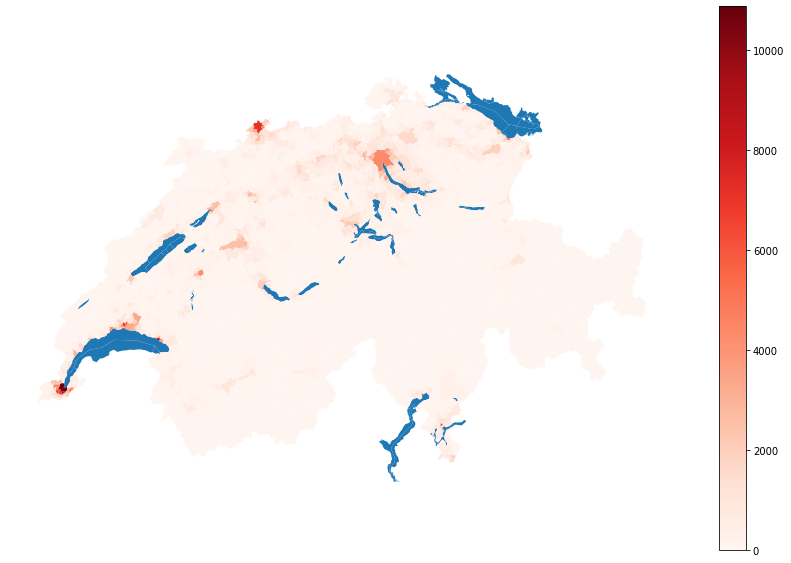

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
lakes.plot(ax=ax)
pop.plot(column='density', cmap='Reds', ax=ax, legend=True)
plt.axis('off')
plt.savefig('swiss_map.png')
plt.show()

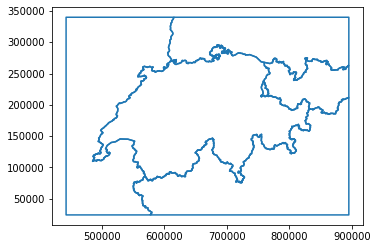

In [14]:
#Just for fun:

shp_path ='swiss_data/swissTLMRegio/SHAPEFILE_LV03/swissTLMRegio_LANDESGEBIET_LV03.shp'
sw1=gpd.read_file(shp_path)
sw1.boundary.plot()

In [3]:
#More Fun:
# create colormap as subset of a known colormap:

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


cmap = plt.get_cmap('Reds')
new_cmap = truncate_colormap(cmap, 0.3, 1)


fig, ax = plt.subplots(figsize=(15, 10))
lakes.plot(ax=ax)
pop.plot(column='density', cmap=new_cmap, ax=ax, legend=True)
plt.axis('off')
#plt.savefig('swiss_map2.png')
plt.show()